In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("bank.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


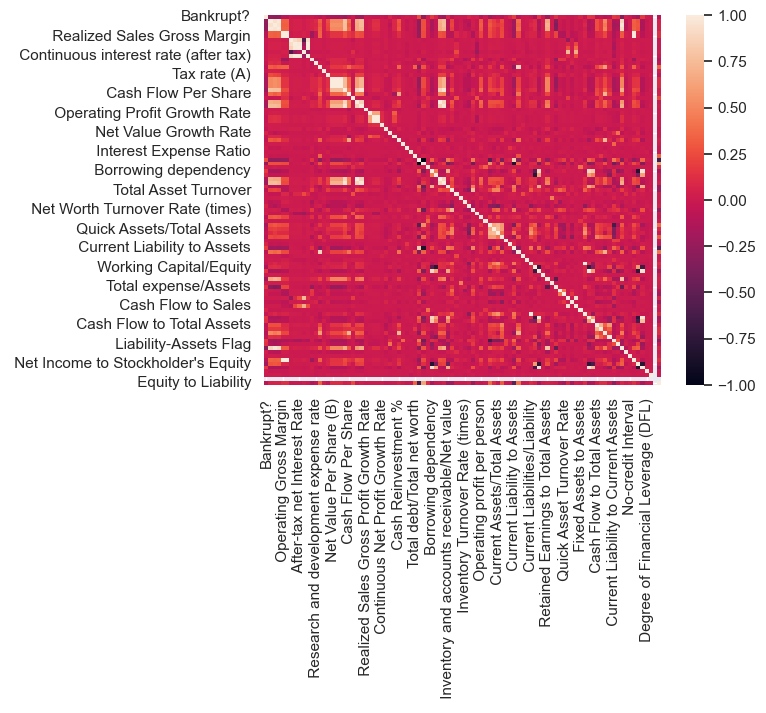

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(data.corr())
plt.show()

In [5]:
X = data.drop(["Bankrupt?"], axis="columns")
y = data["Bankrupt?"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
logreg.score(x_test, y_test)

0.9560117302052786

In [8]:
# After training the logistic regression model
predictions = logreg.predict(x_test)


In [9]:
# After training the logistic regression model
feature_importances = logreg.coef_[0]
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance rankings
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. Feature '{X.columns[idx]}' has importance {feature_importances[idx]}")


1. Feature ' Fixed Assets to Assets' has importance 3.3783126876702453e-09
2. Feature ' Net Value Growth Rate' has importance 2.8674559006069333e-09
3. Feature ' Revenue per person' has importance 6.903407636551366e-10
4. Feature ' Cash/Current Liability' has importance 2.977931468802067e-10
5. Feature ' Total assets to GNP price' has importance 4.52737441935117e-11
6. Feature ' Liability-Assets Flag' has importance 9.318769052850864e-18
7. Feature ' Contingent liabilities/Net worth' has importance 2.8858786394546155e-19
8. Feature ' Current Liability to Current Assets' has importance 4.927626883284949e-21
9. Feature ' Total income/Total expense' has importance -1.913877951439324e-18
10. Feature ' Long-term fund suitability ratio (A)' has importance -8.135508008616196e-18
11. Feature ' Total expense/Assets' has importance -1.1458218275781654e-17
12. Feature ' Realized Sales Gross Profit Growth Rate' has importance -1.678745965135137e-17
13. Feature ' Degree of Financial Leverage (DFL)'

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Train and evaluate a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_f1_score = f1_score(y_test, rf_predictions)

print("Random Forest F1 Score:", rf_f1_score)


Random Forest F1 Score: 0.20338983050847456


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with standard scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Train and evaluate the model
pipeline.fit(x_train, y_train)
pipeline_score = pipeline.score(x_test, y_test)
print("Pipeline Accuracy:", pipeline_score)


Pipeline Accuracy: 0.9589442815249267


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# You can further explore the model's performance using cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5)
average_cv_score = np.mean(cv_scores)
print("Cross-Validation Average Score:", average_cv_score)


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Cross-Validation Average Score: 0.9596719329235365


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result